In [1]:
! git clone https://github.com/katerynaCh/MMA-DFER.git MMADFER

Cloning into 'MMADFER'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 118 (delta 43), reused 86 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 1.77 MiB | 6.09 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
! mv MMADFER/* ./

In [3]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Odyssey')

Mounted at /content/drive


In [2]:
! cp ./drive/MyDrive/Odyssey/audiomae_pretrained.pth ./
! cp ./drive/MyDrive/Odyssey/mae_face_pretrain_vit_base.pth ./

In [3]:
from torch import nn
from models.Generate_Model import GenerateModel

class defs:
    def __init__(self):
      self.temporal_layers = 1
      self.img_size = 224
      self.number_class =8

args = defs()
model = GenerateModel(args=args).cuda()


Image checkpoint loading:  _IncompatibleKeys(missing_keys=['learnable_prompts_init', 'head.weight', 'head.bias', 'learnable_prompts_progr.0', 'learnable_prompts_progr.1', 'audio_proj_pre.0.0.weight', 'audio_proj_pre.0.0.bias', 'audio_proj_pre.0.1.weight', 'audio_proj_pre.0.1.bias', 'audio_proj_pre.1.0.weight', 'audio_proj_pre.1.0.bias', 'audio_proj_pre.1.1.weight', 'audio_proj_pre.1.1.bias', 'audio_proj_pre.2.0.weight', 'audio_proj_pre.2.0.bias', 'audio_proj_pre.2.1.weight', 'audio_proj_pre.2.1.bias', 'audio_proj_pre.3.0.weight', 'audio_proj_pre.3.0.bias', 'audio_proj_pre.3.1.weight', 'audio_proj_pre.3.1.bias', 'audio_proj_pre.4.0.weight', 'audio_proj_pre.4.0.bias', 'audio_proj_pre.4.1.weight', 'audio_proj_pre.4.1.bias', 'audio_proj_pre.5.0.weight', 'audio_proj_pre.5.0.bias', 'audio_proj_pre.5.1.weight', 'audio_proj_pre.5.1.bias', 'audio_proj_pre.6.0.weight', 'audio_proj_pre.6.0.bias', 'audio_proj_pre.6.1.weight', 'audio_proj_pre.6.1.bias', 'audio_proj_pre.7.0.weight', 'audio_proj_pre.

In [5]:
! pip install wget
! pip install moviepy

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=294ae5f31fae6e7bd688c4a5450e55d3b355568790dedb1eed3c6c7ad51b9543
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [54]:
import wget
import zipfile
import os
actors = 1 # 24 max
for x in range(1,actors+1):
  num_str = None
  if(x < 10):
    num_str = "0" + str(x)
  else:
    num_str = str(x)
  url = "https://zenodo.org/records/1188976/files/Video_Speech_Actor_" + num_str + ".zip?download=1"
  print("Downloading: ", url)
  filename = wget.download(url)
  print("Unzipping: ", filename)
  with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./Data/')
  print("Deleting zip: ", filename)
  os.remove(filename)

Downloading:  https://zenodo.org/records/1188976/files/Video_Speech_Actor_01.zip?download=1
Unzipping:  Video_Speech_Actor_01.zip
Deleting zip:  Video_Speech_Actor_01.zip


In [71]:
# extract and save audio
import cv2
import shutil

actors = os.listdir("./Data/")
training_files = []
testing_files = []
counter = 0
for actor in actors:
  files = os.listdir("./Data/"+ actor)
  for filename in files:
    file_split_dash = filename.split("-")
    file_split_dot = filename.split(".")
    if((file_split_dash[0] == "01") and (file_split_dot[1] == "mp4")):
      cap = cv2. VideoCapture("./Data/"+filename)
      length = int(cap. get(cv2. CAP_PROP_FRAME_COUNT))
      counter = counter + 1
      class_idx = file_split_dash[2]
      dest = "./testing/" + str(counter) + " " + " " + str(length) + " " + str(class_idx) + ".mp4"
      shutil.copyfile("./Data/Actor_01/" + filename, dest)


In [105]:
# File naming convention

# Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

# Filename identifiers

# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

# Filename example: 02-01-06-01-02-01-12.mp4

# Video-only (02)
# Speech (01)
# Fearful (06)
# Normal intensity (01)
# Statement "dogs" (02)
# 1st Repetition (01)
# 12th Actor (12)
# Female, as the actor ID number is even.

import torch
import torchvision.transforms as transforms
import os
import random
import moviepy
import numpy as np
import librosa
import librosa
import torchaudio
import random

class RAVDESSCreateDataset(torch.utils.data.Dataset):
  def __init__(self, filenames):
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.files = filenames.copy()
    # Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
    self.emotions = ["Neutral","Calm","Happy","Sad","Angry","Fearful","Disgust","Surprised"]

  def __getitem__(self, index):
    filename = self.files[index]
    filename_split = filename.split("-")
    # print(filename)
    label_str = self.emotions[int(filename_split[2])-1]
    video_clip = VideoFileClip(filename)
    video_clip = video_clip.resize( (224,224))
    # get random section of the video clip:
    start_offset = random.uniform(0.5,video_clip.duration-0.8)
    video_clip = video_clip.subclip(start_offset, start_offset + 0.52)
    video_data = np.array([frame for frame in video_clip.iter_frames()]).astype(np.float32)
    video_data = torch.tensor(video_data)
    video_data = torch.reshape(video_data, (-1, 3, 224, 224))

    audio_filename = "." + filename.split(".")[1] + ".wav"
    waveform, sr = torchaudio.load(audio_filename)
    waveform = waveform - waveform.mean()
    fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False,
                                                  window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
    target_length = 512
    n_frames = fbank.shape[0]

    p = target_length - n_frames

    # cut and pad
    if p > 0:
        m = torch.nn.ZeroPad2d((0, 0, 0, p))
        fbank = m(fbank)
    elif p < 0:
        fbank = fbank[0:target_length, :]
    freqm = torchaudio.transforms.FrequencyMasking(0)
    timem = torchaudio.transforms.TimeMasking(0)
    fbank = fbank.transpose(0,1).unsqueeze(0)
    fbank = torch.transpose(fbank.squeeze(), 0, 1) # time, freq
    fbank = (fbank - (-4.2677393)) / ( 4.5689974 * 2) #audioset

    return video_data, fbank.unsqueeze(0), label_str
    # return {"video":video, "audio":audio, "label_classes":label_classes, "label_id":label_id, "label_str":label_str, "gender":gender}

  def __len__(self):
    return len(self.files)

def CreateDatasets(training_split_decimal):
  actors = os.listdir("./Data/")
  training_files = []
  testing_files = []
  training_split = int(training_split_decimal * 60)
  for actor in actors:
    files = os.listdir("./Data/"+actor)
    num_files = len(files)
    indexes = random.sample(range(num_files), num_files)
    counter = 0
    for i in indexes:
      file_split_dash = files[i].split("-")
      file_split_dot = files[i].split(".")
      if((file_split_dash[0] == "01") and (file_split_dot[1] == "mp4")):
        if(counter < training_split):
          training_files.append("./Data/" + actor + "/" + files[i])
        else:
          testing_files.append("./Data/" + actor + "/" + files[i])
        counter = counter + 1
  train = RAVDESSCreateDataset(training_files)
  test = RAVDESSCreateDataset(testing_files)
  return train, test

RAVDESS_training_set, RAVDESS_testing_set = CreateDatasets(0.8)

In [106]:
model.eval()
val_loader = torch.utils.data.DataLoader(RAVDESS_testing_set,
                                        batch_size=1,
                                        shuffle=False,
                                        pin_memory=True)
for i, (images, audio, target) in enumerate(val_loader):
  print(images.shape)
  print(audio.shape)
  print(target)
  print(model(images, audio))
  break
# data = RAVDESS_testing_set[0]
# torch.zeros(1, 16, 3, 224,224)

# for the model  k ∈ {1, 2, 3, 4, 5, 6, 7} refer to happy, sad, neutral, angry, surprise,


torch.Size([1, 16, 3, 224, 224])
torch.Size([1, 1, 512, 128])
('Happy',)
tensor([[ 0.2464,  0.7947,  0.0822, -1.0445,  1.2475, -0.6246, -0.0226]],
       grad_fn=<AddmmBackward0>)


In [4]:
! unzip  -o -q '/content/drive/MyDrive/Odyssey/Dev_MSP.zip' -d "./"

In [5]:

import torch
import torchvision.transforms as transforms
import os
import random
import moviepy
import numpy as np
import random

class CreateMSPDataset(torch.utils.data.Dataset):
  def __init__(self, root, num_files):
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.root = root
    #{0: 'Angry', 1: 'Sad', 2: 'Happy', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Contempt', 7: 'Neutral'}
    self.emotions = ["Angry","Sad","Happy","Surprise","Fear","Disgust","Contempt","Neutral"]
    # Angry (A), Sad (S), Happy (H), Surprise (U), Fear (F), Disgust (D), Contempt (C), Neutral (N)
    self.em_abr = ["A", "S", "H", "U","F","D","C","N"]
    self.files = os.listdir(self.root)
    self.files = reduced_list = random.sample(self.files, num_files)

  def __getitem__(self, index):
    filename = self.files[index]
    filename_split = filename.split("-")
    label_num = self.em_abr.index(filename_split[2])
    label_classes = 8 * [0.0]
    label_classes[label_num] = 1.0
    label_classes = torch.tensor(label_classes)
    label_str = self.emotions[label_num]
    audio_filename = self.root + filename

    waveform, sr = torchaudio.load(audio_filename)
    waveform = waveform - waveform.mean()
    fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False,
                                                  window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
    target_length = 512
    n_frames = fbank.shape[0]

    p = target_length - n_frames

    # cut and pad
    if p > 0:
        m = torch.nn.ZeroPad2d((0, 0, 0, p))
        fbank = m(fbank)
    elif p < 0:
        fbank = fbank[0:target_length, :]
    freqm = torchaudio.transforms.FrequencyMasking(0)
    timem = torchaudio.transforms.TimeMasking(0)
    fbank = fbank.transpose(0,1).unsqueeze(0)
    fbank = torch.transpose(fbank.squeeze(), 0, 1) # time, freq
    fbank = (fbank - (-4.2677393)) / ( 4.5689974 * 2) #audioset

    return fbank.unsqueeze(0), label_classes

  def __len__(self):
    return len(self.files)

MSP_dev_set = CreateMSPDataset("./Dev_MSP/", 1000)
MSP_train_set = CreateMSPDataset("./Dev_MSP/", 100)

In [6]:
import torchaudio

def MSP_accuracy(model, test_items):
  model.eval()
  counter = 0
  correct = 0

  val_loader = torch.utils.data.DataLoader(MSP_dev_set,
                                          batch_size=1,
                                          shuffle=True,
                                          pin_memory=True)
  for i, (audio, target) in enumerate(val_loader):
    output = model(torch.zeros(1, 16, 3, 224,224).cuda(), audio.cuda())
    if(output.argmax(dim=1) == target.cuda().argmax(dim=1)):
      correct = correct + 1
    counter = counter + 1
    if(counter >= test_items):
      break
  return correct/counter

MSP_accuracy(model,30)

0.0

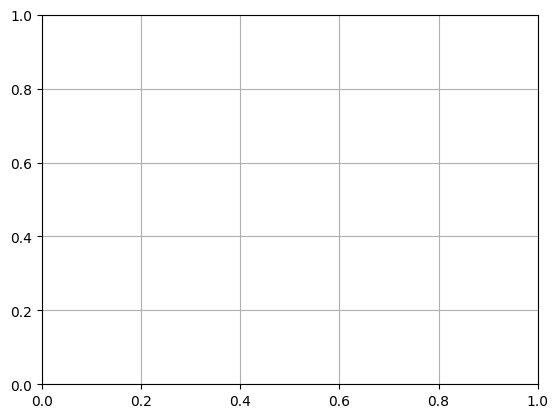

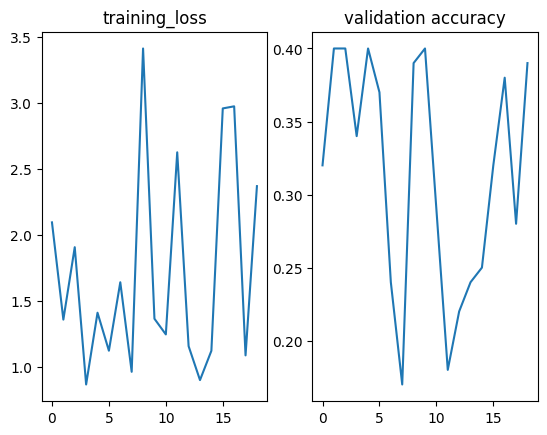

KeyboardInterrupt: 

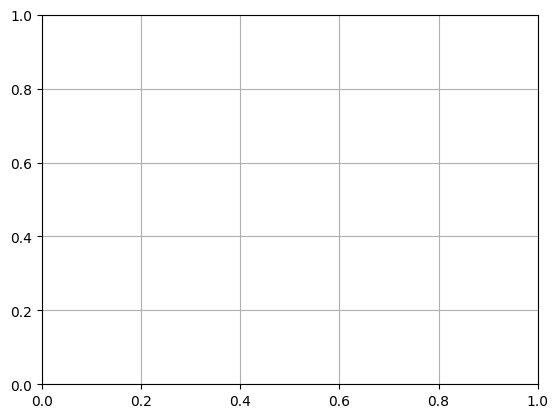

In [7]:
import torch
import torch.nn as nn
import torchaudio
from IPython import display
import matplotlib.pyplot as plt

val_loader = torch.utils.data.DataLoader(MSP_train_set,
                                        batch_size=1,
                                        shuffle=True,
                                        pin_memory=True)

# define loss function (criterion)
criterion = nn.CrossEntropyLoss().cuda()

# define optimizer
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.0001)
training_loss_data = []
accuracy = []


for epoch in range(100):
  for i, (audio, target) in enumerate(val_loader):
      # compute output
      output = model(torch.zeros(1, 16, 3, 224,224).cuda(), audio.cuda())
      loss = criterion(output, target.cuda())

      # compute gradient and do SGD step
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  training_loss_data.append(loss.item())
  accuracy.append(MSP_accuracy(model, 100))
  model.train()
  fig, ax = plt.subplots(nrows=1, ncols=2)
  ax[0].plot(training_loss_data)
  ax[0].set_title('training_loss')
  ax[1].plot(accuracy)
  ax[1].set_title('validation accuracy')
  display.clear_output(wait=True)
  plt.show()
  plt.grid()

In [8]:
MSP_dev_set = CreateMSPDataset("./Dev_MSP/", 1000)
print(MSP_accuracy(model,1000))

0.37
